# **Netflix Data Analysis**

# Questions
1) Find out which types of genre has most movies and TV Shows

2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

3) Which countries contribute the most to the content library?

4) What is the average duration of movies, and how does it vary across different ratings?

5) What are the most common ratings, and how are they distributed across different types of content?

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("netflix_movies (1).csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [102]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [104]:
print(len(df))

8807


In [105]:
# there are no duplicates
df=df.drop_duplicates()
print(len(df))

8807


In [106]:
df.shape

(8807, 12)

In [107]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [108]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [129]:
df.fillna(method = "ffill",inplace = True)
print(df.shape)

(8807, 12)


<ipython-input-129-846fca85b431>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = "ffill",inplace = True)


In [130]:
df["cast"].replace(np.NaN,df["cast"].mode()[0], inplace=True)

<ipython-input-130-469d90b694fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cast"].replace(np.NaN,df["cast"].mode()[0], inplace=True)


In [131]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [112]:
df.shape

(8807, 12)

# 1) Find out which types of genre has most movies and TV Shows.

In [113]:
df = pd.read_csv("netflix_movies (1).csv")

In [132]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [115]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [116]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1
"TV Comedies, TV Dramas, TV Horror",1
"Children & Family Movies, Comedies, LGBTQ Movies",1


In [117]:

#1)Find out which types of genre has most movies and TV Shows
df1 = df[["type","listed_in"]].value_counts().reset_index(name = "counts")
df2 = df1.head(10)
df2

,type,listed_in,counts
0,Movie,"Dramas, International Movies",362
1,Movie,Documentaries,359
2,Movie,Stand-Up Comedy,334
3,Movie,"Comedies, Dramas, International Movies",274
4,Movie,"Dramas, Independent Movies, International Movies",252
5,TV Show,Kids' TV,220
6,Movie,Children & Family Movies,215
7,Movie,"Children & Family Movies, Comedies",201
8,Movie,"Documentaries, International Movies",186
9,Movie,"Dramas, International Movies, Romantic Movies",180


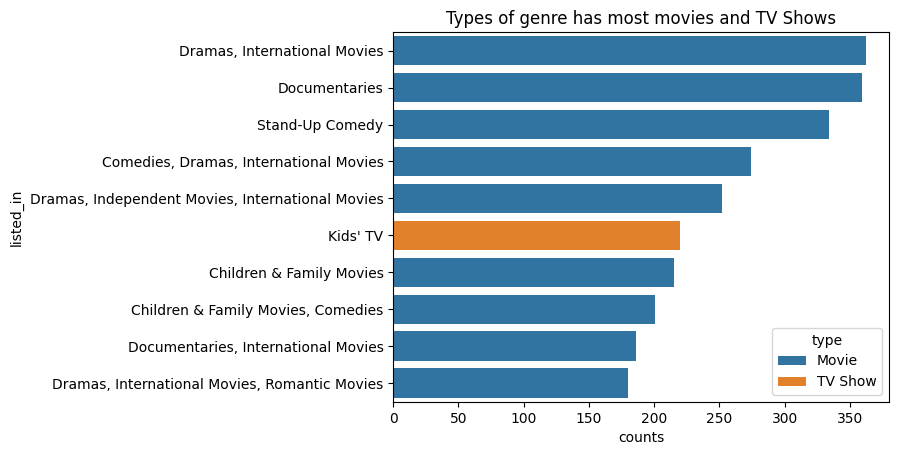

In [118]:
sns.barplot(data = df2,x= "counts", y="listed_in",hue = "type")
plt.title("Types of genre has most movies and TV Shows")
plt.show()


# 2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

In [133]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [134]:
df['type'].value_counts()


,count
type,
Movie,6131
TV Show,2676


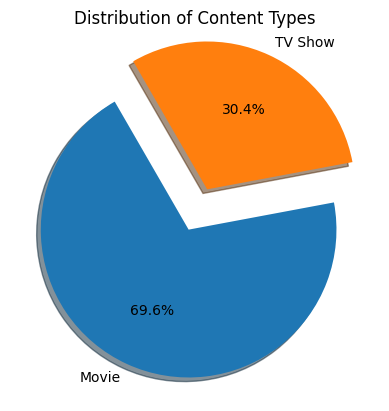

In [121]:
type_counts = df['type'].value_counts()
explode=[0.1,0.2]

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=120,
       shadow=True,explode=explode)
plt.title('Distribution of Content Types')
plt.show()

# 3) Which countries contribute the most to the content library?

In [135]:
coun=df[['type','country']]
coun.head()

,type,country
0,Movie,United States
1,TV Show,South Africa
2,TV Show,South Africa
3,TV Show,South Africa
4,TV Show,India


In [124]:
dt1 = df["country"].value_counts().reset_index(name = "counts")
dt2 = dt1.head(10)
dt2

,country,counts
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


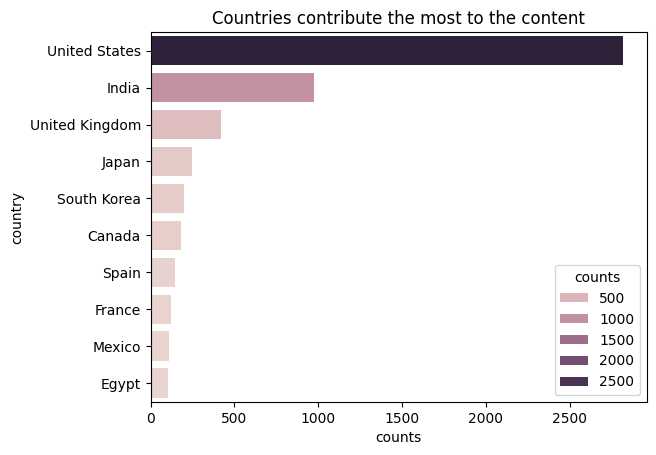

In [138]:
sns.barplot(data = dt2,x = "counts",y = "country",hue = "counts")
plt.title("Countries contribute the most to the content")
plt.show()


# 5) What are the most common ratings, and how are they distributed across different types of content?

In [149]:
df1 = df["rating"].value_counts().reset_index(name = "counts")
df2 = df1
df2

,rating,counts
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


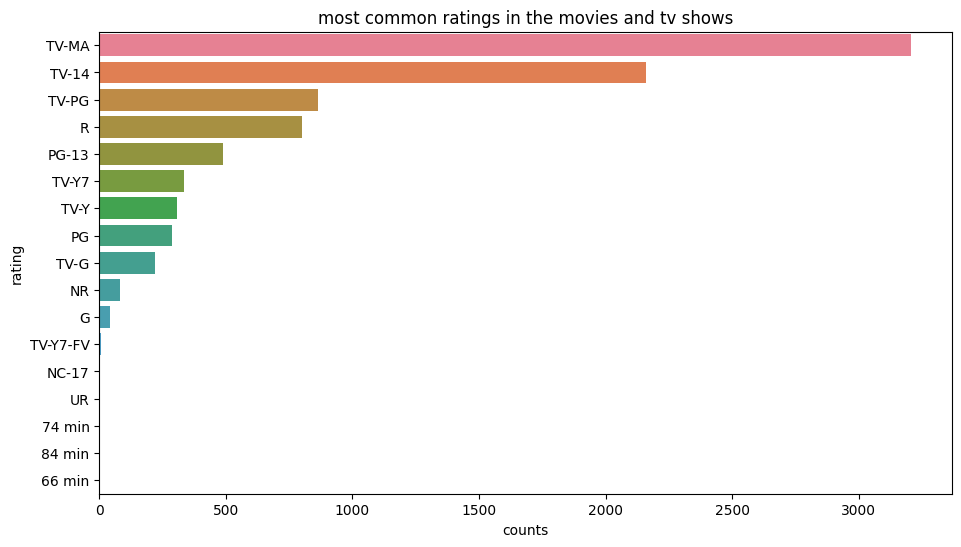

In [151]:
plt.figure(figsize=(11,6))
sns.barplot(data = df2 ,x = "counts",y = "rating",hue = "rating")
plt.title("most common ratings in the movies and tv shows")
plt.show()
